$$\newcommand{\Rv}{\mathbf{R}}
\newcommand{\rv}{\mathbf{r}}
\newcommand{\Qv}{\mathbf{Q}}
\newcommand{\Qnv}{\mathbf{Qn}}
\newcommand{\Av}{\mathbf{A}}
\newcommand{\Aiv}{\mathbf{Ai}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\TDv}{\mathbf{TD}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Reinforcement Learning for Two-Player Games

How does Tic-Tac-Toe differ from the maze problem?

   * Different state and action sets.
   * Two players rather than one.
   * Reinforcement is 0 until end of game, when it is 1 for win, 0 for draw, or -1 for loss.
   * Maximizing sum of reinforcement rather than minimizing.
   * Anything else?

## Representing the Q Table

The state is the board configuration.  There are $3^9$ of them, though
not all are reachable. Is this too big? 

It is a bit less than 20,000.  Not bad. Is this the full size of the Q table?

No. We must add the action dimension.  There are at most 9 actions,
one for each cell on the board.  So the Q table will contain about
$20,000 \cdot 9$ values or about 200,000. No worries. 

Instead of thinking about the Q table as a three-dimensional array, as
we did last time, let's be more pythonic and use a dictionary.  Use
the current state as the key, and the value associated with the state
is an array of Q values for each action taken in that state.

We still need a way to represent a board.  

How about an array of characters?  So

     X |   | O
     ---------
       | X | O
     ---------
     X |   |

would be

     board = np.array(['X',' ','O', ' ','X','O', 'X',' ',' '])

The initial board would be

     board = np.array([' ']*9)

We can represent a move as an index, 0 to 8,  into this array.

What should the reinforcement values be?  

How about 0 every move except when X wins, with a reinforcement of 1,
and when O wins, with a reinforcement of -1.

For the above board, let's say we, meaning Player X, prefer move to
index 3. In fact, this always results in a win.  So the Q value for
move to 3 should be 1.  What other Q values do you know?

If we don't play a move to win, O could win in one move.  So the other
moves might have Q values close to -1, depending on the skill of
Player O.  In the following discussion we will be using a random
player for O, so the Q value for a move other than 8 or 3 will be
close to but not exactly -1.

## Agent-World Interaction Loop

For our agent to interact with its world, we must implement

   1. Initialize Q.
   1. Set initial state, as empty board.
   1. Repeat:
     1. Agent chooses next X move.
     1. If X wins, set Q(board,move) to 1.
     1. Else, if board is full, set Q(board,move) to 0.
     1. Else, let O take move.
     1. If O won, update Q(board,move) by (-1 - Q(board,move))
     1. For all cases, update Q(oldboard,oldmove) by Q(board,move) - Q(oldboard,oldmove)
     1. Shift current board and move to old ones.

## Now in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from copy import copy

Let's write a function to print a board in the usual Tic-Tac-Toe style.

In [2]:
def printBoard(board):
    print('{}|{}|{}\n-----\n{}|{}|{}\n-----\n{}|{}|{}'.format(*board))

board = np.array(['X',' ','O', ' ','X','O', 'X',' ',' '])
printBoard(board)

X| |O
-----
 |X|O
-----
X| | 


Let's write a function that returns *True* if the current board is a winning board for us.  We will be Player X.  What does the value of *combos* represent?

In [3]:
def winner(board):
    combos = np.array((0,1,2, 3,4,5, 6,7,8, 0,3,6, 1,4,7, 2,5,8, 0,4,8, 2,4,6))
    return np.any(np.logical_or(np.all('X' == board[combos].reshape((-1,3)), axis=1),
                                np.all('O' == board[combos].reshape((-1,3)), axis=1)))          

In [4]:
board = np.array(['X',' ','O', ' ','X','O', 'X',' ',' '])
printBoard(board)
winner(board)

X| |O
-----
 |X|O
-----
X| | 


False

In [5]:
board[3] = 'X'
printBoard(board)
winner(board)

X| |O
-----
X|X|O
-----
X| | 


True

How can we find all valid moves from a board?  Just find all of the spaces in the board representation

In [6]:
np.where(board == ' ')

(array([1, 7, 8]),)

In [7]:
np.where(board == ' ')[0]

array([1, 7, 8])

And how do we pick one at random and make that move?

In [8]:
board = np.array(['X',' ','O', ' ','X','O', 'X',' ',' '])
validMoves = np.where(board == ' ')[0]
move = np.random.choice(validMoves)
boardNew = copy(board)
boardNew[move] = 'X'
print('From this board')
printBoard(board)
print('\n  Move',move)
print('\nresults in board')
printBoard(boardNew)

From this board
X| |O
-----
 |X|O
-----
X| | 

  Move 3

results in board
X| |O
-----
X|X|O
-----
X| | 


If X just won, we want to set the Q value for the previous state (board) to 1, because X will always win from that state and that action (move).

First we must figure out how to implement the Q table.  We want to associate a value with each board and move.  We can use a python dictionary for this.  We know how to represent a board.  A move can be an integer from 0 to 8 to index into the board array for the location to place a marker.

In [9]:
Q = {}  # empty table
Q[(tuple(board),1)] = 0
Q

{(('X', ' ', 'O', ' ', 'X', 'O', 'X', ' ', ' '), 1): 0}

In [10]:
Q[(tuple(board),1)]

0

What if we try to look up a Q value for a state,action we have not encountered yet?  It will not be in the dictionary.  We can use the *get* method for the dictionary, that has a second argument as the value returned if the key does not exist.

In [11]:
board[1] = 'X'
Q[(tuple(board),1)]

KeyError: (('X', 'X', 'O', ' ', 'X', 'O', 'X', ' ', ' '), 1)

In [12]:
Q.get((tuple(board),1), 42)

42

Now we can set the Q value for (board,move) to 1.

In [13]:
Q[(tuple(board),move)] = 1

If the board is full and we have a draw, then the previous state and action should be assigned 0.

In [14]:
Q[(tuple(board),move)] = 0

If the board is not full, better check to see if O just won.  If O did just win, then we should adjust the Q value of the previous state and X action to be closer to -1, because we just received a -1 reinforcement and the game is over.

In [15]:
rho = 0.1 # learning rate
Q[(tuple(board),move)] += rho * (-1 - Q[(tuple(board),move)])

If nobody won yet, let's calculate the temporal difference error and use it to adjust the Q value of the previous board,move. We do this only if we are not at the first move of a game.

In [16]:
step = 0
if step > 0:
    Q[(tuple(boardOld),moveOld)] += rho * (Q[(tuple(board),move)] - Q[(tuple(boardOld),moveOld)])

Initially, taking random moves is a good strategy, because we know nothing about how to play Tic-Tac-Toe.  But, once we have gained some experience and our Q table has acquired some good predictions of the sum of future reinforcement, we should rely on our Q values to pick good moves.  For a given board, which move is predicted to lead to the best possible future using the current Q table?

In [17]:
validMoves = np.where(board == ' ')[0]
print('Valid moves are',validMoves)
Qs = np.array([Q.get((tuple(board),m), 0) for m in validMoves]) 
print('Q values for validMoves are',Qs)
bestMove = validMoves[np.argmax(Qs)]
print('Best move is',bestMove)

Valid moves are [3 7 8]
Q values for validMoves are [-0.1  0.   0. ]
Best move is 7


To slowly transition from taking random actions to taking the action currently believed to be best, called the *greedy* action, we slowly decay a parameter, $\epsilon$, from 1 down towards 0 as the probability of selecting a random action.  This is called the $\epsilon$-greedy policy.

In [18]:
def epsilonGreedy(epsilon, Q, board):
    validMoves = np.where(board == ' ')[0]
    if np.random.uniform() < epsilon:
        # Random Move
        return np.random.choice(validMoves)
    else:
        # Greedy Move
        Qs = np.array([Q.get((tuple(board),m), 0) for m in validMoves]) 
        return validMoves[ np.argmax(Qs) ]
    
epsilonGreedy(0.8, Q, board)

7

Now write a function to make plots to show results of some games.  Say the variable *outcomes* is a vector of 1's, 0's, and -1's, for games in which X wins, draws, and loses, respectively.

In [19]:
outcomes = np.random.choice([-1,0,1],replace=True,size=(1000))
outcomes[:10]

array([-1,  0,  1,  1, -1,  0,  0,  1,  1,  1])

In [20]:
def plotOutcomes(outcomes,epsilons,maxGames,nGames):
    if nGames==0:
        return
    nBins = 100
    nPer = int(maxGames/nBins)
    outcomeRows = outcomes.reshape((-1,nPer))
    outcomeRows = outcomeRows[:int(nGames/float(nPer))+1,:]
    avgs = np.mean(outcomeRows,axis=1)
    plt.subplot(3,1,1)
    xs = np.linspace(nPer,nGames,len(avgs))
    plt.plot(xs, avgs)
    plt.xlabel('Games')
    plt.ylabel('Mean of Outcomes\n(0=draw, 1=X win, -1=O win)')
    plt.title('Bins of {:d} Games'.format(nPer))
    plt.subplot(3,1,2)
    plt.plot(xs,np.sum(outcomeRows==1,axis=1),'g-',label='Wins')
    plt.plot(xs,np.sum(outcomeRows==-1,axis=1),'r-',label='Losses')
    plt.plot(xs,np.sum(outcomeRows==0,axis=1),'b-',label='Draws')
    plt.legend(loc="center")
    plt.ylabel('Number of Games\nin Bins of {:d}'.format(nPer))
    plt.subplot(3,1,3)
    plt.plot(epsilons[:nGames])
    plt.ylabel('$\epsilon$')

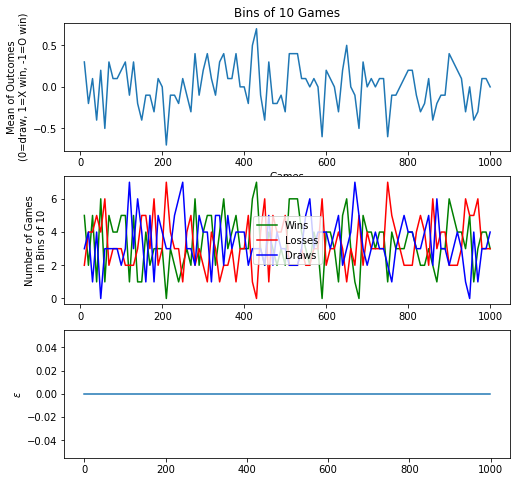

In [21]:
plt.figure(figsize=(8,8))
plotOutcomes(outcomes,np.zeros(1000),1000,1000)

Finally, let's write the whole Tic-Tac-Toe learning loop!

In [22]:
from IPython.display import display, clear_output

Outcomes: 45984 X wins 2280 O wins 1736 draws


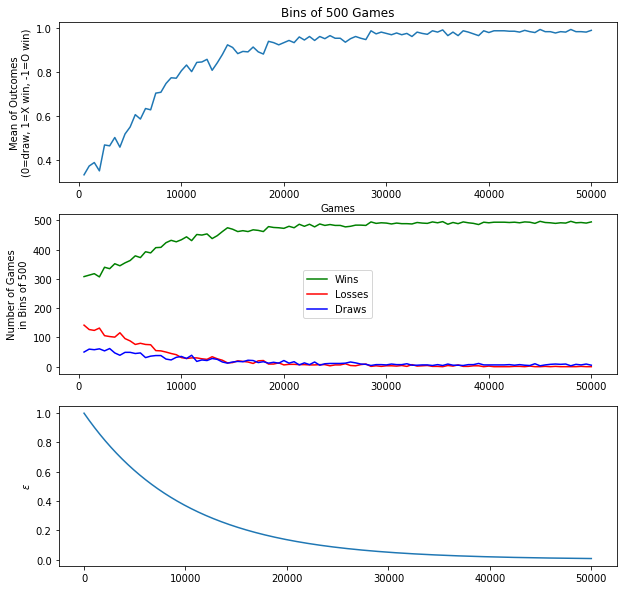

In [23]:
maxGames = 50000
rho = 0.2
epsilonDecayRate = 0.9999
epsilon = 1.0
graphics = True
showMoves = not graphics

outcomes = np.zeros(maxGames)
epsilons = np.zeros(maxGames)
Q = {}

if graphics:
    fig = plt.figure(figsize=(10,10))

for nGames in range(maxGames):
    epsilon *= epsilonDecayRate
    epsilons[nGames] = epsilon
    step = 0
    board = np.array([' '] * 9)  # empty board
    done = False
    
    while not done:        
        step += 1
        
        # X's turn
        move = epsilonGreedy(epsilon, Q, board)
        boardNew = copy(board)
        boardNew[move] = 'X'
        if (tuple(board),move) not in Q:
            Q[(tuple(board),move)] = 0  # initial Q value for new board,move
        if showMoves:
            printBoard(boardNew)
            
        if winner(boardNew):
            # X won!
            if showMoves:
                print('        X Won!')
            Q[(tuple(board),move)] = 1
            done = True
            outcomes[nGames] = 1
            
        elif not np.any(boardNew == ' '):
            # Game over. No winner.
            if showMoves:
                print('        draw.')
            Q[(tuple(board),move)] = 0
            done = True
            outcomes[nGames] = 0
            
        else:
            # O's turn.  O is a random player!
            moveO = np.random.choice(np.where(boardNew==' ')[0])
            boardNew[moveO] = 'O'
            if showMoves:
                printBoard(boardNew)
            if winner(boardNew):
                # O won!
                if showMoves:
                    print('        O Won!')
                Q[(tuple(board),move)] += rho * (-1 - Q[(tuple(board),move)])
                done = True
                outcomes[nGames] = -1
        
        if step > 1:
            Q[(tuple(boardOld),moveOld)] += rho * (Q[(tuple(board),move)] - Q[(tuple(boardOld),moveOld)])
            
        boardOld, moveOld = board, move # remember board and move to Q(board,move) can be updated after next steps
        board = boardNew
        
        if graphics and (nGames % (maxGames/10) == 0 or nGames == maxGames-1):
            fig.clf() 
            plotOutcomes(outcomes,epsilons,maxGames,nGames-1)
            clear_output(wait=True)
            display(fig);

if graphics:
    clear_output(wait=True)
print('Outcomes: {:d} X wins {:d} O wins {:d} draws'.format(np.sum(outcomes==1), np.sum(outcomes==-1), np.sum(outcomes==0)))

How can we examine the Q function that predicts the future for every board and move?

In [24]:
Q[(tuple([' ']*9),0)]

0.9230650057431151

In [25]:
Q[(tuple([' ']*9),1)]

0.8749058639901397

In [26]:
Q.get((tuple([' ']*9),0), 0)

0.9230650057431151

In [27]:
[Q.get((tuple([' ']*9),m), 0) for m in range(9)]

[0.9230650057431151,
 0.8749058639901397,
 0.8655685317074937,
 0.8603397995883176,
 0.9843601642478599,
 0.890435329300564,
 0.806481795278868,
 0.9128700451465435,
 0.8544165349744817]

In [28]:
board = np.array([' ']*9)
Qs = [Q.get((tuple(board),m), 0) for m in range(9)]
printBoard(board)
print()
print('''{:5.2f} | {:5.2f} | {:5.2f}
---------------------
{:5.2f} | {:5.2f} | {:5.2f}
---------------------
{:5.2f} | {:5.2f} | {:5.2f}'''.format(*Qs))

 | | 
-----
 | | 
-----
 | | 

 0.92 |  0.87 |  0.87
---------------------
 0.86 |  0.98 |  0.89
---------------------
 0.81 |  0.91 |  0.85


In [29]:
def printBoardQs(board,Q):
    printBoard(board)
    Qs = [Q.get((tuple(board),m), 0) for m in range(9)]
    print()
    print('''{:5.2f} | {:5.2f} | {:5.2f}
---------------------
{:5.2f} | {:5.2f} | {:5.2f}
---------------------
{:5.2f} | {:5.2f} | {:5.2f}'''.format(*Qs))

In [30]:
board[0] = 'X'
board[1] = 'O'
printBoardQs(board,Q)

X|O| 
-----
 | | 
-----
 | | 

 0.00 |  0.00 |  0.13
---------------------
 0.62 |  1.00 |  0.20
---------------------
 0.40 |  0.21 |  0.41


In [31]:
board[4] = 'X'
board[3] = 'O'
printBoardQs(board,Q)

X|O| 
-----
O|X| 
-----
 | | 

 0.00 |  0.00 |  0.79
---------------------
 0.00 |  0.00 |  0.33
---------------------
 0.75 |  0.43 |  1.00


In [32]:
board[0] = 'X'
board[4] = 'O'
printBoardQs(board,Q)

X|O| 
-----
O|O| 
-----
 | | 

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00


In [33]:
board[2] = 'X'
board[1] = 'O'
printBoardQs(board,Q)

X|O|X
-----
O|O| 
-----
 | | 

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00


In [34]:
board[7] = 'X'
board[3] = 'O'
printBoardQs(board,Q)

X|O|X
-----
O|O| 
-----
 |X| 

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.64
---------------------
 0.00 |  0.00 |  0.00


In [35]:
board[5] = 'X'
board[6] = 'O'
printBoardQs(board,Q)

X|O|X
-----
O|O|X
-----
O|X| 

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  1.00


In [38]:
board = np.array([' ']*9)
printBoardQs(board,Q)

 | | 
-----
 | | 
-----
 | | 

 0.92 |  0.87 |  0.87
---------------------
 0.86 |  0.98 |  0.89
---------------------
 0.81 |  0.91 |  0.85


In [45]:
board[4] = "X"
printBoardQs(board,Q)

 | | 
-----
 |X|O
-----
 | |O

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00


In [46]:
board[5] = " "
printBoardQs(board,Q)

 | | 
-----
 |X| 
-----
 | |O

 0.91 |  0.85 |  0.90
---------------------
 0.65 |  0.00 |  1.00
---------------------
 0.72 |  0.86 |  0.00


In [47]:
board[5] = "X"
printBoardQs(board,Q)

 | | 
-----
 |X|X
-----
 | |O

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00


In [48]:
board[3] = "O"
printBoardQs(board,Q)

 | | 
-----
O|X|X
-----
 | |O

 0.00 |  0.15 |  0.12
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.96 |  0.09 |  0.00


In [50]:
board[6] = "X"
printBoardQs(board,Q)

 | | 
-----
O|X|X
-----
X| |O

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00


In [51]:
board[2] = "O"
printBoardQs(board,Q)

 | |O
-----
O|X|X
-----
X| |O

 0.00 |  0.68 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.36 |  0.00


In [52]:
board[1] = "X"
printBoardQs(board,Q)

 |X|O
-----
O|X|X
-----
X| |O

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00


In [53]:
board[7] = "O"
printBoardQs(board,Q)

 |X|O
-----
O|X|X
-----
X|O|O

 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
---------------------
 0.00 |  0.00 |  0.00
